In [6]:
import pandas as pdf
import numpy as np
import preprocess
import analysis.train_data_analysis 
import analysis.model_assessment
import matplotlib.pyplot as plt

In [2]:
data = np.load('../train_no_clouds.npz')
refls = data['output_rfl']
wv = data['output_wv']
fids = data['output_idx']

values, counts = np.unique(fids, return_counts=True)
scenes = np.split(refls, 743)
wv_by_scene = np.split(wv, 743)
scenes = np.array(scenes)
wv_by_scene = np.array(wv_by_scene)

print(scenes.shape)
print(wv_by_scene.shape)

bad = []
for i in range(wv_by_scene.shape[0]):
    scene = wv_by_scene[i].copy()
    if scene[np.where((scene > 6) | (scene < 0))].shape[0] != 0:
        bad.append(i)

wv_by_scene = np.delete(wv_by_scene, bad, axis = 0)
scenes = np.delete(scenes, bad, axis = 0)
print(scenes.shape)
print(wv_by_scene.shape)

(743, 1242, 285)
(743, 1242)
(718, 1242, 285)
(718, 1242)


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


dataset = []
preds = []
models = []
seeds = [10, 20, 30, 40, 50, 60]

for i in range(len(seeds)):
    np.random.seed(seeds[i])
    X_idx = np.random.choice(718, 200)
    y_idx = X_idx
    X_train_idx, X_test_idx, y_train_idx, y_test_idx = train_test_split(X_idx, y_idx, test_size = 0.2, random_state = 50)
    
    X_train = scenes[X_train_idx, :, :]
    X_train = X_train.reshape((X_train.shape[0]*X_train.shape[1], X_train.shape[2]))
    X_test = scenes[X_test_idx, :, :]
    X_test = X_test.reshape((X_test.shape[0]*X_test.shape[1], X_test.shape[2]))
    y_train = wv_by_scene[y_train_idx, :]
    y_train = y_train.flatten()
    y_test = wv_by_scene[y_test_idx, :]
    y_test = y_test.flatten()


    dt = DecisionTreeRegressor(random_state = 0)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)

    models.append(dt)
    dataset.append((X_train, y_train, X_test, y_test))
    preds.append(y_pred)



In [4]:
print(len(models))
print(len(dataset))
print(len(preds))

6
6
6


Generated  1
Generated  2
Generated  3
Generated  4
Generated  5
Generated  6


C:\Users\vpatro\AppData\Local\Temp\ipykernel_1228\3568141258.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


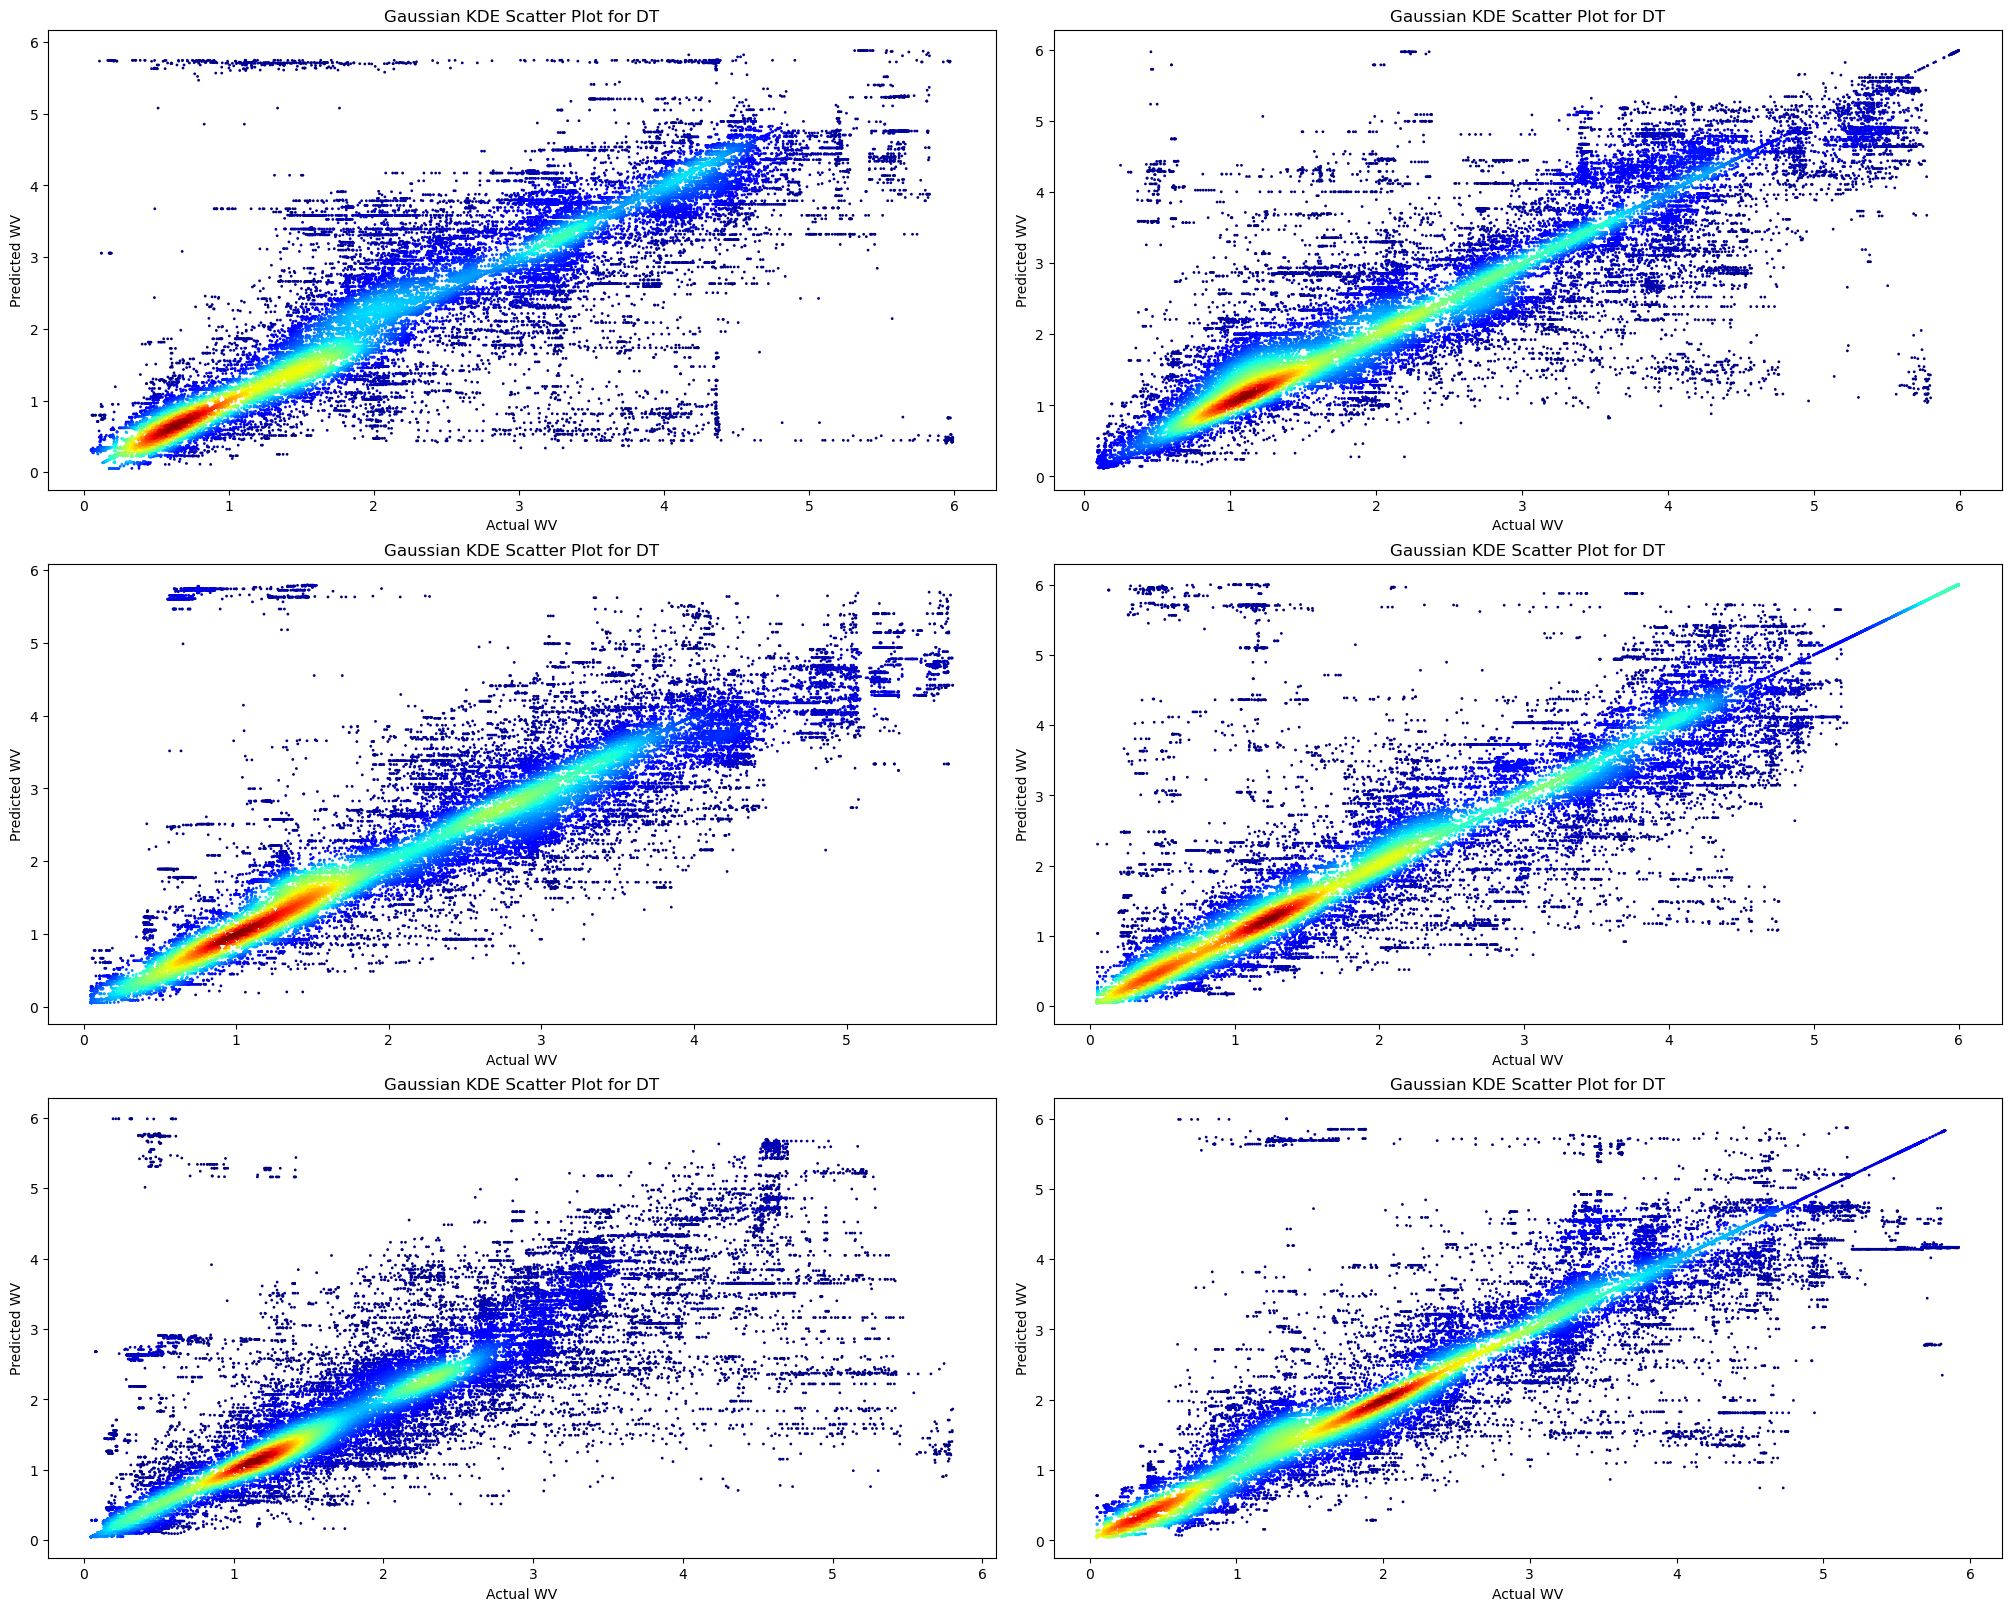

In [21]:
from scipy.stats import gaussian_kde
%matplotlib inline
fig, axs = plt.subplots(3, 2, figsize = (20,16), constrained_layout = True)
row, col = 0, 0
for i in range(len(seeds)):
    if col == 2:
        row +=1
        col = 0
    xy_model = np.vstack([dataset[i][3], preds[i]])
    z_model = gaussian_kde(xy_model)(xy_model)

    y_pred = preds[i]
    y_test = dataset[i][3]

    axs[row, col].scatter(y_test, y_pred, c=z_model, s=1, cmap="jet")
    axs[row, col].set_xlabel('Actual WV')
    axs[row, col].set_ylabel('Predicted WV')
    axs[row, col].set_title('Gaussian KDE Scatter Plot for DT')

    col += 1

    print('Generated ', i+1)

fig.show()

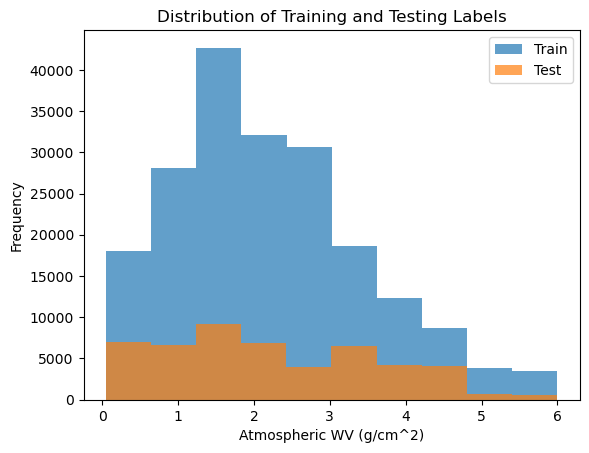

In [12]:
analysis.model_assessment.plot_hist(y_train, y_test, 'Distribution of Training and Testing Labels', 'Train', 'Test')

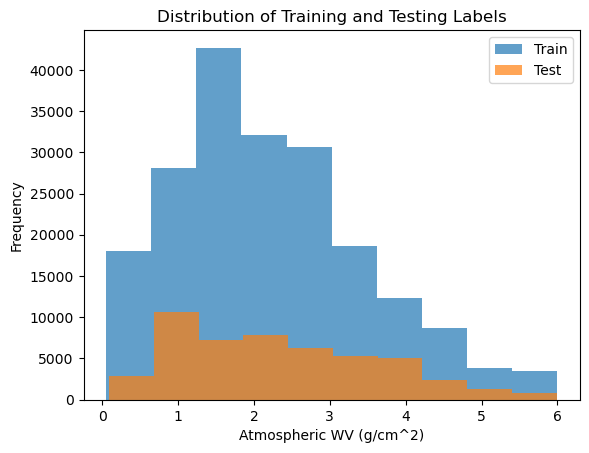

In [14]:
y_test = dataset[1][3]
y_pred = preds[1]
analysis.model_assessment.plot_hist(y_train, y_test, 'Distribution of Training and Testing Labels', 'Train', 'Test')

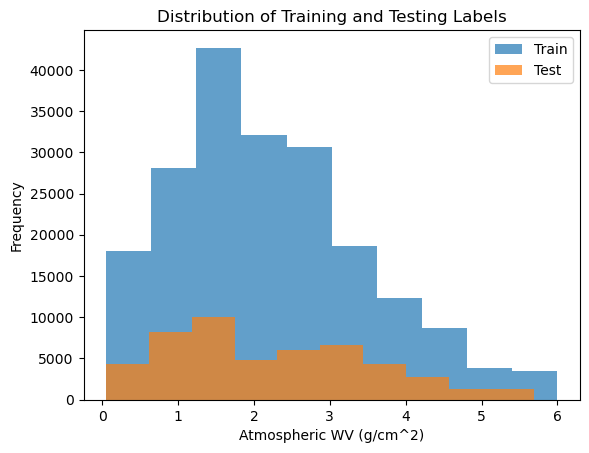

In [15]:
y_test = dataset[2][3]
y_pred = preds[2]
analysis.model_assessment.plot_hist(y_train, y_test, 'Distribution of Training and Testing Labels', 'Train', 'Test')

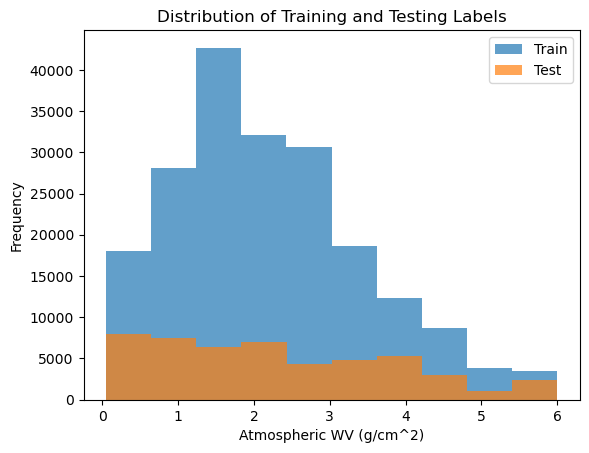

In [16]:
y_test = dataset[3][3]
y_pred = preds[3]
analysis.model_assessment.plot_hist(y_train, y_test, 'Distribution of Training and Testing Labels', 'Train', 'Test')

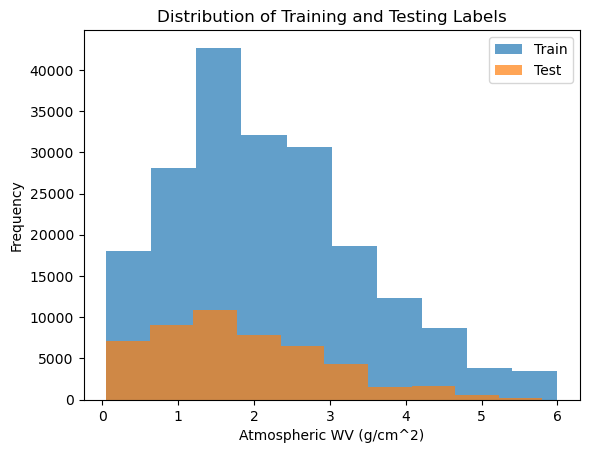

In [17]:
y_test = dataset[4][3]
y_pred = preds[4]
analysis.model_assessment.plot_hist(y_train, y_test, 'Distribution of Training and Testing Labels', 'Train', 'Test')

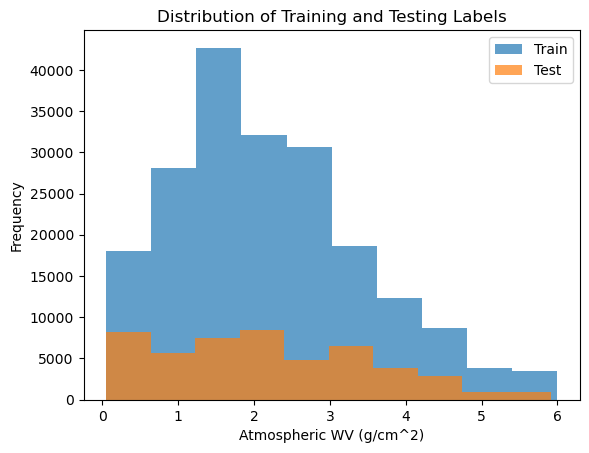

In [18]:
y_test = dataset[5][3]
y_pred = preds[5]
analysis.model_assessment.plot_hist(y_train, y_test, 'Distribution of Training and Testing Labels', 'Train', 'Test')

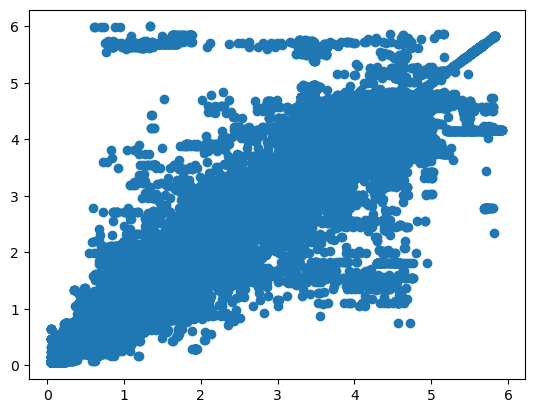

In [19]:
plt.scatter(y_test, y_pred)